![alt text](file://KB/simple_pipeline.jpg "Sample Pipeline")

## BMI 6115 Module 3: A simple NLP pipeline
![image.png](attachment:image.png "A simple NLP pipeline")
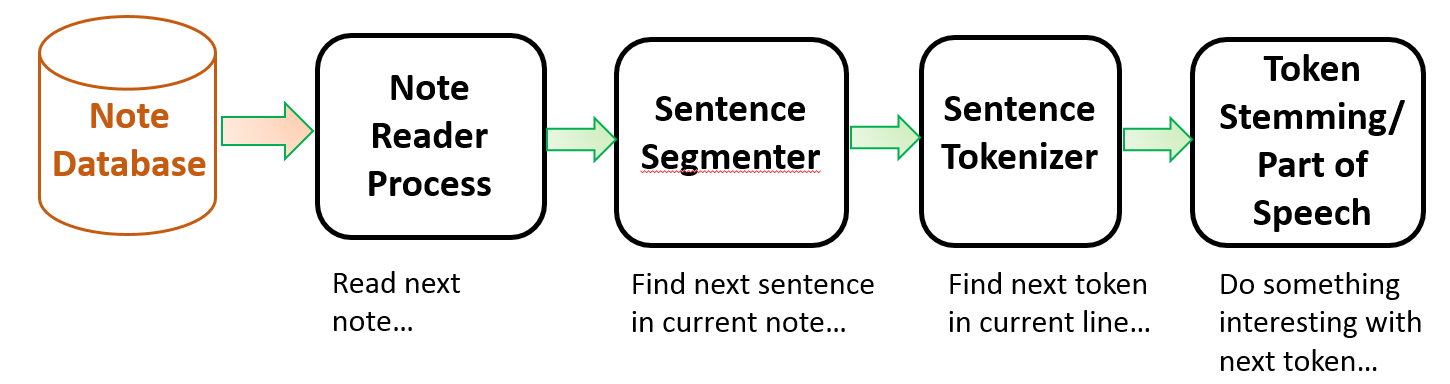

# Sentence Segmentation

Sentence segmentation, a critical natural language processing (NLP) task, has a profound effect on downstream processing tasks, because most clinical NLP tasks are applied at the sentential level. Most sentence segmenters are developed using non-clinical text and do not segment clinical text well due to clinical text’s telegraphic style e.g., non-standard grammar, short forms, and missing punctuations. 

In this notebook, we will exercise several sentence segmenters: NLTK, TextBlob, Spacy and PyRuSH. Let's import these packages:

In [1]:
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import spacy
from PyRuSH.RuSH import RuSH

We are going to try two types of text:
* literature text
* clinical note

Here is a paragraph from [a pubmed paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5469017/):

In [3]:
lit_text="The Veterans Aging Cohort Study (VACS) is a large, longitudinal, observational study of a cohort of HIV infected and matched uninfected Veterans receiving care within the VA [2]. This cohort was designed to examine important health outcomes, including cardiovascular diseases like heart failure, among HIV infected and uninfected Veterans. For the purposes of understanding the mechanisms driving HIV infection and the risk of heart failure, more data involving cardiac structure and function are required. These data are currently available within the VA EMR resulting from echocardiography or ultrasound procedures used to evaluate the structures of the heart and the velocity of blood flow. While calculated using specialized equipment, echocardiography measurements are generally entered into the EMR as an echocardiogram report, a mostly unstructured or semi-structured text document that, while human readable, limits the access and retrievabilty of any given measure. This means that studying heart disease incidence, comorbidities, and trends over time can be a challenging task because detailed data typically must be extracted from text using manual chart review, or entered prospectively into a project-specific database [3–5]."

Here is a note from de-identified clinical dataset (MIMIC dataset, we will introduce this dataset in next module).  

In [4]:
cli_text='''CCU NPN 7am - 7 pm
S:  "They told me that I died twice last night."
O:  CVS:  HR 70 - 80 afib.  some PVC's noted later in the afternoon.  BP - 100 - 130's/ 50 - 60's.  Right thigh size remains the same as yesterday.  Pedal pulses are dopplerable.  Heparin was restarted today at 800u/hr. without bolus. PTT pending. Pt. denies chest pressure or SOB.  Pt. scheduled for CABG tomorrow at 2 pm.
Resp:  RR 18 - 24 non labored.  O2 sats are 94 - 100% on 4 lnp.  lung sounds are diminished at the bases.  Some wheezes noted in the afternoon. Pt. was given 80 mg of IV lasix.  U/O response was about 600cc's.
G.I.:  Pt. is tolerating a regular diet today.  Will be NPO after MN.  Given colace.  LBM [**1-9**].
G.U.:  Pt. voiding via foley catheter.  Creat - 1.2, BUN 35.
Heme:  HCT 29.9.  given 1UPRBC.   HCT pending.
F/E:  Ca++ 7.7.  Pt. given 2 amps.  Potassium 3.7.  Pt. given 40 Meq p.o.
I.D.:  Tmax 101.2 p.o.  vanco D/C'd, ceftriaxone D/C'd,  flagyl changed to p.o.,  started on levaquin.  WBC's - 11.
A:  CHF, s/p vtach,  awaiting surgery tomorrow.
P:  check labs, monitor for further rhythm disturbances, NPO after MN, pre op CABG as written for tomorrow.'''

First, let's take a look at how these segementers perform on literature text.

## 1. NLTK sentence detector

<p><font color='darkblue'>NLTK wrapped [Stanford coreNLP sentence detector](https://stanfordnlp.github.io/CoreNLP/ssplit.html), with simple interface.</font></p>

In [5]:

sent_tokenize_list = sent_tokenize(lit_text)
for s in sent_tokenize_list:
    print(s)
    print('\n'+'-'* 100+'\n')

The Veterans Aging Cohort Study (VACS) is a large, longitudinal, observational study of a cohort of HIV infected and matched uninfected Veterans receiving care within the VA [2].

----------------------------------------------------------------------------------------------------

This cohort was designed to examine important health outcomes, including cardiovascular diseases like heart failure, among HIV infected and uninfected Veterans.

----------------------------------------------------------------------------------------------------

For the purposes of understanding the mechanisms driving HIV infection and the risk of heart failure, more data involving cardiac structure and function are required.

----------------------------------------------------------------------------------------------------

These data are currently available within the VA EMR resulting from echocardiography or ultrasound procedures used to evaluate the structures of the heart and the velocity of blood flo

<p><font color='darkblue'>It shows decent performance in sentence detection. However, NLTK only gives a list of strings. So we have not idea about the sentences' positions in the original input text. So often using this API is not recommended.</font></p>

## 2. TextBlob sentence detector

<p><font color='darkblue'>TextBlob add additional functions to that, which allows us to read the sentence spans, sot that we can keep track the how the text are splitted into sentences.</font></p>

In [6]:
blob = TextBlob(lit_text)
for s in blob.sentences:
    print("Sentence({}-{}):\t{}".format(s.start, s.end,s))
    print('\n'+'-'* 100+'\n')


Sentence(0-178):	The Veterans Aging Cohort Study (VACS) is a large, longitudinal, observational study of a cohort of HIV infected and matched uninfected Veterans receiving care within the VA [2].

----------------------------------------------------------------------------------------------------

Sentence(179-339):	This cohort was designed to examine important health outcomes, including cardiovascular diseases like heart failure, among HIV infected and uninfected Veterans.

----------------------------------------------------------------------------------------------------

Sentence(340-506):	For the purposes of understanding the mechanisms driving HIV infection and the risk of heart failure, more data involving cardiac structure and function are required.

----------------------------------------------------------------------------------------------------

Sentence(507-693):	These data are currently available within the VA EMR resulting from echocardiography or ultrasound procedures 

## 3. spaCy
<p><font color='darkblue'>We will learn more about spaCy later in this course. Here we just have a glance at its sentence segmenter.</font></p>

In [7]:
nlp = spacy.load('en')
document = nlp(lit_text)
for sentence in document.sents:
    print("Sentence({}-{}):\t{}".format(sentence.start, sentence.end,sentence))
    print('\n'+'-'* 100+'\n')

Sentence(0-35):	The Veterans Aging Cohort Study (VACS) is a large, longitudinal, observational study of a cohort of HIV infected and matched uninfected Veterans receiving care within the VA [2].

----------------------------------------------------------------------------------------------------

Sentence(35-59):	This cohort was designed to examine important health outcomes, including cardiovascular diseases like heart failure, among HIV infected and uninfected Veterans.

----------------------------------------------------------------------------------------------------

Sentence(59-86):	For the purposes of understanding the mechanisms driving HIV infection and the risk of heart failure, more data involving cardiac structure and function are required.

----------------------------------------------------------------------------------------------------

Sentence(86-116):	These data are currently available within the VA EMR resulting from echocardiography or ultrasound procedures used t

### 4. PyRuSH

PyRuSH is the python implementation of [RuSH](https://github.com/jianlins/RuSH)(**Ru**le-based sentence **S**egmenter using **H**ashing), which is orginally developed 
using Java. RuSH is an efficient, reliable, and easy adaptable rule-based sentence segmentation
solution. It is specifically designed to handle the telegraphic written text in clinical note. It leverages a nested
hash table to execute simultaneous rule processing, which reduces the impact of the rule-base growth
on execution time and eliminates the effect of rule order on accuracy. 

In [8]:
rush = RuSH('KB/rush_rules.tsv')
sentences=rush.segToSentenceSpans(lit_text)
for sentence in sentences:
    print("Sentence({}-{}):\t{}".format(sentence.begin, sentence.end, lit_text[sentence.begin:sentence.end]))
    print('\n'+'-'* 100+'\n')

Sentence(0-178):	The Veterans Aging Cohort Study (VACS) is a large, longitudinal, observational study of a cohort of HIV infected and matched uninfected Veterans receiving care within the VA [2].

----------------------------------------------------------------------------------------------------

Sentence(179-339):	This cohort was designed to examine important health outcomes, including cardiovascular diseases like heart failure, among HIV infected and uninfected Veterans.

----------------------------------------------------------------------------------------------------

Sentence(340-506):	For the purposes of understanding the mechanisms driving HIV infection and the risk of heart failure, more data involving cardiac structure and function are required.

----------------------------------------------------------------------------------------------------

Sentence(507-693):	These data are currently available within the VA EMR resulting from echocardiography or ultrasound procedures 

As you may have observed, for literature text, there is not much difference between these sentence segmenters. Let's try use them to segment clinical notes.


### Exercise 1:
Use TextBlob to segment cli_text.

In [9]:
# try your code here

### Exercise 2:
Use spaCy to segment cli_text.

In [10]:
# try your code here

### Exercise 3:
Use PyRuSH to segment cli_text.

In [11]:
# try your code here

What did you learn?